In [1]:
cd /Users/bastus/Desktop/Forschungsprojekt/genimpro

/Users/bastus/Desktop/Forschungsprojekt/genimpro


In [2]:
%run importwrapper.py
%pylab inline

/Library/Python/2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
allPhenotypesDicts = []
soundcellIDs = []

for recordingID in genimpro.recordings.listRecodings():
    recordingDetails = genimpro.recordings.getRecordingDetails(recordingID)
    
    for track in recordingDetails[4]:
        try:
            ids,phenotypes,durations = genimpro.recordings.getPhenotypesForTrack(track)
            if phenotypes == None: continue
            if type(phenotypes) is list:
                allPhenotypesDicts.extend(phenotypes)
                soundcellIDs.extend(ids)
        except TypeError:
            continue

In [4]:
len(allPhenotypesDicts)

16109

In [5]:
keylist = allPhenotypesDicts[0].keys()
keylist.sort()
print keylist

['Density', 'Detuning', 'DynamicComplexity', 'DynamicGlobalLoudness', 'DynamicKurtosis', 'DynamicSkewness', 'DynamicSpread', 'FollowingRest', 'HPCP 0', 'HPCP 1', 'HPCP 10', 'HPCP 11', 'HPCP 2', 'HPCP 3', 'HPCP 4', 'HPCP 5', 'HPCP 6', 'HPCP 7', 'HPCP 8', 'HPCP 9', 'HarmonicSpread', 'Interval 0', 'Interval 1', 'Interval 10', 'Interval 11', 'Interval 2', 'Interval 3', 'Interval 4', 'Interval 5', 'Interval 6', 'Interval 7', 'Interval 8', 'Interval 9', 'MelodicComplexity', 'MelodicRoot', 'MelodicShape', 'MelodicSpread', 'RhythmicComplexity', 'RhythmicFlatness', 'RhythmicStability', 'RhythmicTempo', 'RhythmicUniformity', 'SpectralCentroid', 'SpectralFlux', 'SpectralInharmonicity', 'SpectralKurtosis', 'SpectralRoughness', 'ZeroCrossingRate']


In [6]:
phenotypeArray = []
for phenotypeDict in allPhenotypesDicts:
    sortedVect = []
    for key in keylist:
        sortedVect.append(phenotypeDict[key])
    phenotypeArray.append(sortedVect)
    
allPhenotypesVect = np.asarray(phenotypeArray)
where_are_NaNs = np.isnan(allPhenotypesVect)
allPhenotypesVect[where_are_NaNs] = 0

<Container object of 12 artists>

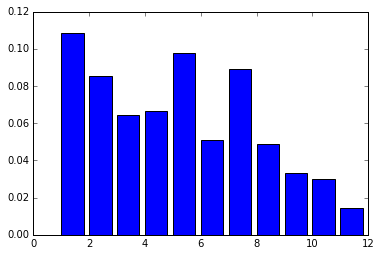

In [7]:
allIntervals = []

for phenotype in allPhenotypesDicts:
    intervals = []
    for i in range(12):
        intervals.append(phenotype["Interval " + str(i)])
    allIntervals.append(intervals)

allIntervals = np.average(allIntervals,axis=0)
allIntervals[0]=0
plt.bar(range(len(allIntervals)),allIntervals)

In [8]:
if 1==0:
    from scipy.spatial import distance

    matrix = distance.cdist(allPhenotypesVect, allPhenotypesVect, 'euclidean')
    matrix = matrix/np.amax(matrix)

    def findSimilarCells(idx):

        sorted_distances_indices = np.argsort(matrix[idx])
        #print matrix 
        return sorted_distances_indices[0:4]

In [9]:
cellPhenotypes = allPhenotypesDicts

53522
FollowingRest


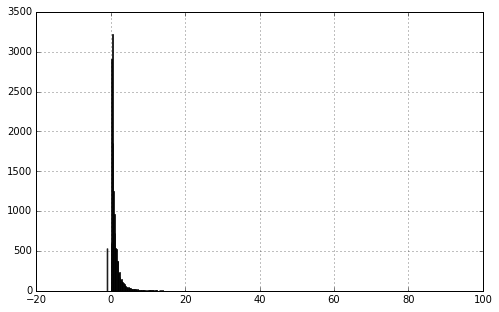

In [10]:
for key in ["FollowingRest"]:#keylist:
    feature = cellPhenotypes[0][key]
    
    if (type(feature)!=type(dict())) & (type(feature)!=type(np.array([0]))) \
            & (type(feature)!=type(list())) & (type(feature)!=type(tuple())):
        
        featureValues = np.asarray([phenotype[key] for phenotype in cellPhenotypes])
        where_are_NaNs = np.isnan(featureValues)
        featureValues[where_are_NaNs] = 0
        print soundcellIDs[np.argmax(featureValues)]
        
        #print featureValues
        fig = plt.figure(figsize=(8, 5), dpi=300)

        cleanValues=featureValues[featureValues>0]
        cleanValues=cleanValues[cleanValues<1]
        cleanValues = featureValues
        n, bins, patches = plt.hist(cleanValues, 500, normed=0, facecolor='black', alpha=0.75)
        print key
        plt.grid(True)
        fig.savefig(key + ".pdf", bbox_inches='tight', pad_inches=0.2)
        plt.show()

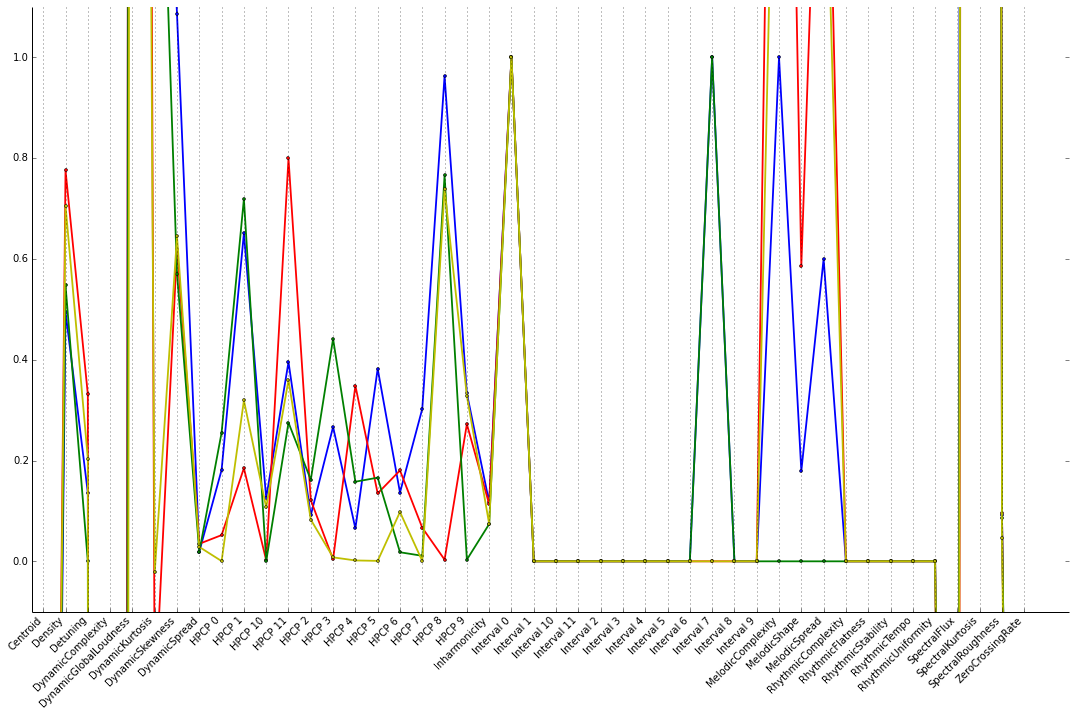

In [81]:
compareSoundCells(9850)

In [69]:
def audioPlayer(filename,cellBoundary):
    
    audio = pydub.AudioSegment.from_file(filename,"aiff")

    wave = audio[(cellBoundary[0]/samplerate)*1000:(cellBoundary[1]/samplerate)*1000]+4
    mp3audio = wave.export(cStringIO.StringIO(), format='mp3')
    mp3audio.reset()
    mp3audio = mp3audio.read()

    # src = """
    # <body>
    # <audio controls="controls" style="width:600px" >
    #   <source controls src="data:audio/wav;base64,{base64}" type="audio/wav" />
    #   Your browser does not support the audio element.
    # </audio>
    # </body>
    # """.format(base64=base64.encodestring(val))


    src = """
    <body>
    <audio controls="controls" style="width:600px" >
      <source controls src="data:audio/mpeg;base64,{base64}" type="audio/mpeg" />
      Your browser does not support the audio element.
    </audio>
    </body>
    """.format(base64=base64.encodestring(mp3audio))
    
    IPython.core.display.display(HTML(src))

In [70]:
def compareSoundCells(soundcellIdx,showFeatures=[]):
    colors = cm.rainbow(np.linspace(0, 1, 3))
    colors = ["b","r","g","y"]
    labels = []
    for key in cellPhenotypes[0].keys():
        feature = cellPhenotypes[0][key]
        if (type(feature)!=type(dict())) & (type(feature)!=type(np.array([0]))) \
                & (type(feature)!=type(list())) & (type(feature)!=type(tuple())):
            labels.append(key)

    x_axis = np.arange(len(labels))
    labels = sorted(labels)

    cellsToPlot = []

    for idx in findSimilarCells(soundcellIdx):
        sortedValues= []
        for key in labels:
            sortedValues.append(cellPhenotypes[idx][key])
        cellsToPlot.append(sortedValues)    
        audioPlayer(audioInfo[idx][0],audioInfo[idx][1])
        #plotCell(idx,showFeatures=showFeatures)

    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    plt.xticks(x_axis, labels, rotation='45',ha="right")
    ax.set_xlim([-0.5, len(cellPhenotypes[0])+1])
    ax.set_ylim(-0.1,1.1)
    ax.xaxis.grid(True)


    cellsToPlot = np.asarray(cellsToPlot)
    #cells_normed = (cellsToPlot - cellsToPlot.min(0)) / cellsToPlot.ptp(0)
    #cells_normed = cellsToPlot / cellsToPlot.max(axis=0)
    cells_normed = cellsToPlot#(cellsToPlot - cellsToPlot.min(0)) / cellsToPlot.ptp(0)
    width = 1.0 / (len(cells_normed) + 1)
    for colorindex,normedValues in enumerate(cells_normed):
        ax.plot(x_axis,normedValues,color=colors[colorindex],marker='o',lw=1.8,ms=3)    
        #ax.bar(x_axis+(width*colorindex),normedValues,width,color=colors[colorindex])    
    plt.show()